## Monopoly Oyunu Analiz

Merhabalar, önceki gün arkadaşlarla monopoly oynadık. Arkadaşım turuncuları tamamlayan oyuncunun hep kazandığını söyledi. Ben de merak ettim acaba her renge gelme ihtimali nedir diye. Bunun üzerine bilgisayarda oyunu simule ettim. Oyunu 1 milyon kez oynattım ve her bir karenin / rengin gelme sıklığını çıkardım.

Aslında bu mühendislikte sık kullanılan bir yöntem. Eğer bir şeyin olasılık hesabını matematiksel olarak yapmak zorsa birebir aynının simulasyonu yazılır ve bu simulasyon çok fazla kez tekrarlanır. Buna Monte Karlo yöntemi deniyor. Bkz. [link](https://en.wikipedia.org/wiki/Monte_Carlo_method)


Öncelikle hatırlamayan olabilir, oyun tahtasını görelim.

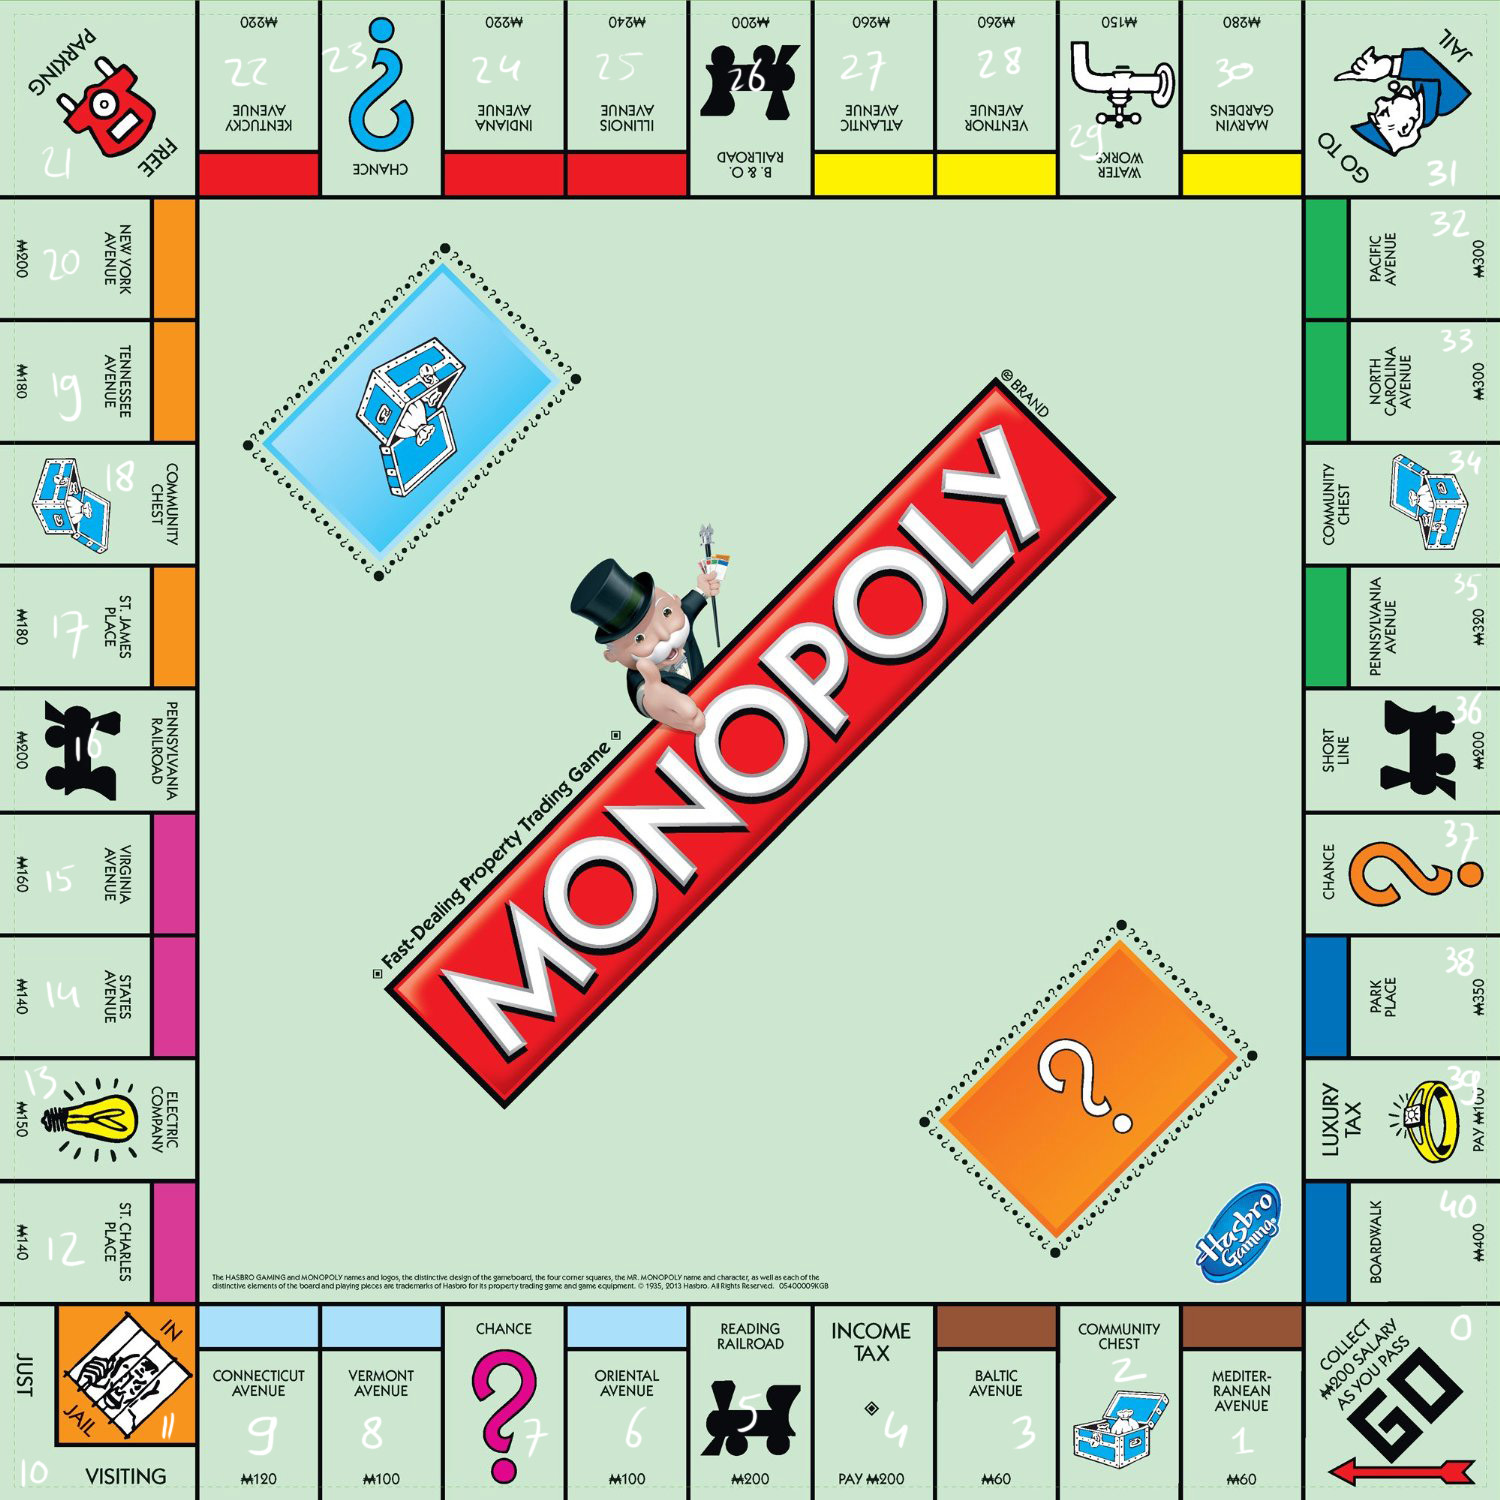

In [1]:
from IPython.display import Image
Image("board.jpg", width=600, height=600)

Oyunun bizim için önemli olan (Herhangi bir kareye gelme ihtimalini değiştiren) kuralları şöyle:

1. Oyuncu çift zar atarsa turunu oynar ve tekrar zar atar
2. Oyuncu 3 defa üst üste çift atarsa hapse düşer
3. Şans veya Kamu Fonu kartlarıyla oyuncunun pozisyonu değişebilir



##### Simulasyon Detayları

1. Simulasyon oyunu 1 oyuncunun oynadığı varsayılarak yapıldı (Sonuçta karelere gelme sıklığını anlamaya çalıştığımız için oyuncu sayısı fark yaratmayacak). 
2. Her oyun 100 round'dan oluşuyor. (1 round her oyuncunun yapacağı hamleleri yapıp sırayı sonraki oyuncuya vermesine kadar geçen hamleler)
3. Tüm şans ve kamu fonu kartları, tahtanın kendi simule edildi. 


Simulasyon kodu oldukça anlaşılır yazıldı. Eğer kodlama öğrenen biriyseniz göz atmanız iyi olabilir. Bu yüzden Github linkini paylaşıyorum. 


[link](https://github.com/ahmetbaglan/Monopoly)



Şimdi simulasyon sonuçlarını yükleyip inceleyelim

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from itertools import cycle, islice
import warnings
warnings.filterwarnings('ignore')
result = pd.read_csv('out.csv', encoding='utf-8').set_index('Place')

In [4]:
result[['Hit', 'Color', 'Ev/Otel Dikme Ücreti', 'Tapu', '0 Ev Kira', '1 Ev Kira', '2 Ev Kira',
       '3 Ev Kira', '4 Ev Kira', 'Otel Kira']]

,Hit,Color,Ev/Otel Dikme Ücreti,Tapu,0 Ev Kira,1 Ev Kira,2 Ev Kira,3 Ev Kira,4 Ev Kira,Otel Kira
Place,,,,,,,,,,
Başlangıç,3140525,Go,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Kasımpaşa,2572365,Brown,50.0,60.0,2.0,10.0,30.0,90.0,160.0,250.0
Kamu Fonu,2298195,Community,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dolapdere,2640190,Brown,50.0,60.0,4.0,20.0,60.0,180.0,320.0,450.0
Gelir Vergiis,3026416,Tax,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Haydarpaşa İstasyonu,3442265,Station,NaN,200.0,NaN,NaN,NaN,NaN,NaN,NaN
Sultanahmet,2781469,Light Blue,50.0,100.0,6.0,30.0,90.0,270.0,400.0,550.0
Şans,1250615,Chance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sirkeci,2858718,Light Blue,50.0,100.0,6.0,30.0,90.0,270.0,400.0,550.0


Toplamda 100 Milyon round oyun oynanması sonucundaki sonuçlar yukardaki gibi. Her kareye kaç kez uğrandığını ve karelere ait özellikleri görebiliyorsunuz (Tapu ve Kira miktarları gibi).

Oyun hakkında başta bir bilgi yokken her kareye gelme ihtimalini hesaplayalım ve buna göre kareleri sıralayalım. 

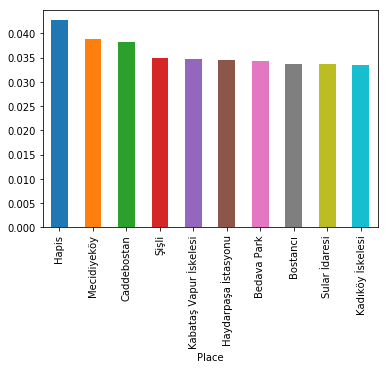

In [6]:
result['Probability'] = result['Hit'].divide((result['Number of Round'] * result['Number of Games']))
result.sort_values('Hit', ascending=False)['Probability'].iloc[:10].plot(kind = 'bar')
plt.show()


Görüldüğü üzere en çok uğranan kare hapis. Herhangi bir roundda hapse düşme ihtimali %4'ün üzerinde. Bu beklenebilecek bir sonuç çünkü bazı şans ve kamu fonu kartları hapse gönderebiliyor.  Onun haricinde Mecidiyeköy ve Caddebostanın ihtimali yüksek çünkü hapisten sonra bu karelere gelme ihtimaliniz yüksek.  

Şimdi renklere göre gruplayalım ve hangi renkerin daha güçlü olduğunu görelim

In [7]:
colorGroups = ['Brown', 'Red', 'Orange', 'Light Blue', 'Dark Blue', 'Yellow', 'Green', 'Purple']
my_colors = ['saddlebrown', 'red', 'darkorange', 'c', 'b', 'yellow','green', 'magenta']
colorDf = result.groupby('Color').sum()
colorDf = colorDf.loc[colorGroups]
colorDf['color_codes'] = my_colors
colorDf = colorDf.loc[colorGroups].sort_values('Hit')

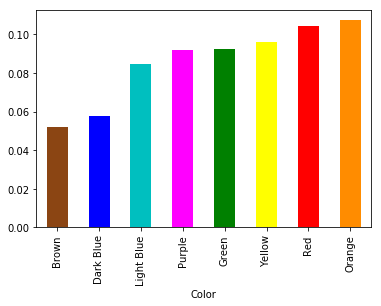

In [8]:
colorDf['Probability'].plot(kind = 'bar', color = colorDf.color_codes)
plt.show()

Gerçekten de arkadaşımın tahmin ettiği gibi turunculara gelme ihtimali en yüksek. Herhangi bir kişi sırasını oynarken %10'dan yüksek bir ihtimalle turuncuya geliyor. Oyunda normalde birden çok rakibiniz olduğunu düşünürsek herkes kendi turunu oynadıktan sonra herhangi birinin turuncuya gelme ihtimali daha da yüksek olacaktır. 

Kişi sayısına göre bu ihtimali görecek olursak

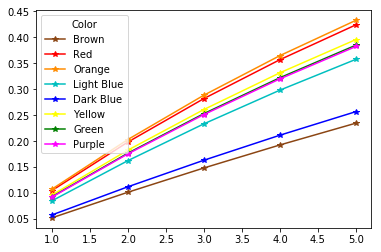

In [9]:
iRange = range(1,6)

prob = pd.concat([pd.DataFrame((1 - (1-colorDf.loc[colorGroups,'Probability']).pow(i))) for i in iRange], axis = 'columns').transpose()
prob.index = iRange
prob.plot(color = my_colors, style = '*-')


Görüldüğü gibi eğer oyunda sizden başka 5 kişi daha varsa rakiplerinizden birinin turuncuya gelme ihtimali (Herkes bir tur zarları atıp kendi turunu oynadığında) %40'ın üzerinde

Tabiki oyunda karar verirken oyuncunun bir karedeki ev inşa etme fiyatlarını ve üzerinde ev olduğunda getirdiği kirayı da  dikkate alması gerekli. Bu sebepten aslında bakmamız gereken parametre bir turda bir karenin ne kadar kira getirmesini bekleyebileceğimiz (Expected Value) ve bu değerin bir ev inşa etme bedeline oranı.

Şimdi bu sonuçlara bakalım.

In [11]:
emlaklar= result.dropna() # Sadece emlakları al (İstasyon, şans vs kareleri düş)
emlaklar['expected return Otel'] = (emlaklar['Probability'] * emlaklar['Otel Kira']).divide(emlaklar['Ev/Otel Dikme Ücreti'])
emlaklar['expected return 4 Ev'] = (emlaklar['Probability'] * emlaklar['4 Ev Kira']).divide(emlaklar['Ev/Otel Dikme Ücreti'])
emlaklar['expected return 3 Ev'] = (emlaklar['Probability'] * emlaklar['3 Ev Kira']).divide(emlaklar['Ev/Otel Dikme Ücreti'])
emlaklar['expected return 2 Ev'] = (emlaklar['Probability'] * emlaklar['2 Ev Kira']).divide(emlaklar['Ev/Otel Dikme Ücreti'])
emlaklar['expected return 1 Ev'] = (emlaklar['Probability'] * emlaklar['1 Ev Kira']).divide(emlaklar['Ev/Otel Dikme Ücreti'])
emlaklarGroup = emlaklar.groupby('Color').sum()
emlaklarGroup['color_code'] =  ['saddlebrown', 'b', 'green','c' , 'darkorange', 'magenta',  'red',    'yellow']

Üzerinde bir ev varken renklerin değeri

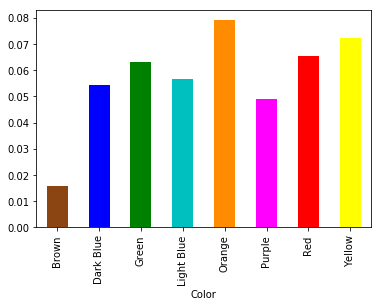

In [12]:
emlaklarGroup['expected return 1 Ev'].plot(kind = 'bar', color = emlaklarGroup.color_code)

Görüldüğü gibi renklerin üzerlerinde 1'er ev varken en değerli turuncu sonra sarı. Burda aslında bir de şöyle bir durum var. Yeşil için 1 ev yapılan fiyatla turuncu ve mora 2 ev yapılabiliyor. Dolayısıyla bu renkler burdakinden bile çok daha değerli. 

Bunu görmek için mor ve turuncunun 2 ev kirasını, kapalı mavi ve yeşilin kirasıyla karşılaştıralım.



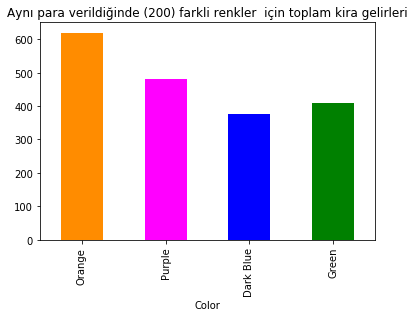

In [27]:
pd.concat([emlaklarGroup.loc[['Orange', 'Purple'], '2 Ev Kira'],emlaklarGroup.loc[['Dark Blue', 'Green'], '1 Ev Kira']]).plot(kind = 'bar', color = ['darkorange', 'magenta', 'b', 'g'])
plt.title('Aynı para verildiğinde (200) farkli renkler  için toplam kira gelirleri')
a = 5

Üzerinde iki ev varken renklerin değeri

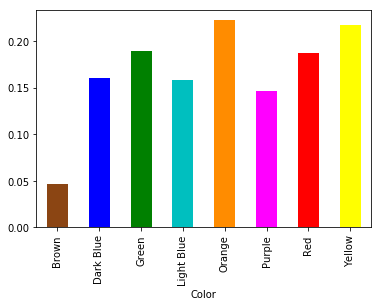

In [13]:
emlaklarGroup['expected return 2 Ev'].plot(kind = 'bar', color = emlaklarGroup.color_code)

Üç ev varken 

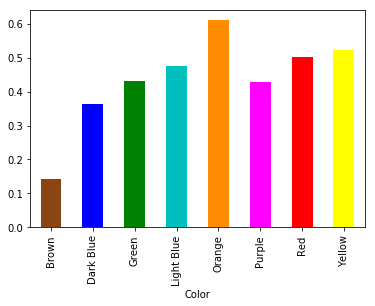

In [14]:
emlaklarGroup['expected return 3 Ev'].plot(kind = 'bar', color = emlaklarGroup.color_code)

4 ev varken 

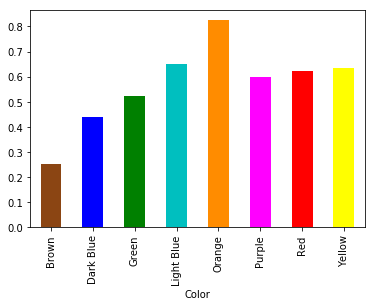

In [15]:
emlaklarGroup['expected return 4 Ev'].plot(kind = 'bar', color = emlaklarGroup.color_code)

Otel varken

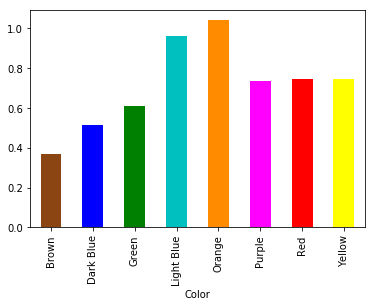

In [12]:
emlaklarGroup['expected return Otel'].plot(kind = 'bar', color = emlaklarGroup.color_code)

Sonuç olarak görüldüğü gibi tüm durumlarda Turuncu en çok kazandıran renk. 



Yukarıda gösterdiğim iki farklı incelemeyi göz önünde bulundurduğumuzda ben renklerin getirisine göre değerleinin aşağıdaki olduğunu düşünüyorum.

Turuncu > Mor > Kırmızı > Açık Mavi > Sarı > Yeşil > Kapalı Mavi > Kahverengi